In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CSI_model_ready.csv", index_col=0)

In [17]:
df.head(5)

,person_age,person_sex,person_appearance,lifestyle_smoking,lifestyle_alcohol,health_BMI,household_income,person_education,relative_cad,relative_disease,...,Parental_HEARTDISEASE,appearance,Hills,Dooars,NB_plains,Rarh,West_plateau,Delta,education,edu
0,0.246451,0,THIN,0,0,-2.250717,-0.180544,HIGHER SECONDARY,NO,NO,...,0,0,0,0,0,0,0,1,HIGHER SECONDARY,4
1,-0.341400,1,SLIM,0,1,-1.083153,-0.444563,PRIMARY SCHOOL,NO,NO,...,0,1,0,0,0,0,0,1,PRIMARY SCHOOL,1
2,1.590111,1,SLIM,1,0,-1.168045,0.314492,SECONDARY,YES,HEART DISEASE,...,1,1,0,0,0,0,0,1,SECONDARY,3
3,1.590111,0,SLIM,0,0,-1.908690,0.149480,SECONDARY,NO,NO,...,0,1,0,0,0,0,0,1,SECONDARY,3
4,1.422154,1,HEALTHY,1,1,0.338971,0.314492,SECONDARY,YES,HEART DISEASE,...,0,2,0,0,0,0,0,1,SECONDARY,3


In [14]:
df.shape

(1730, 31)

In [15]:
df.describe()

,person_age,person_sex,lifestyle_smoking,lifestyle_alcohol,health_BMI,household_income,health_bp_systolic,health_bp_diastolic,report_HBA1C,household_oil_MUSTARD,...,diet_vegetables,diet_fish,diet_chicken,diet_meat,diet_eggs,diet_milk,Parental_Diabetes,Parental_HEARTDISEASE,appearance,edu
count,1.730000e+03,1730.000000,1730.000000,1730.000000,1.730000e+03,1.730000e+03,1730.000000,1730.00000,1.730000e+03,1.730000e+03,...,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000
mean,3.080388e-17,0.579191,0.231214,0.223121,-4.179059e-16,8.214367e-18,136.165896,84.24104,-8.214367e-17,4.107183e-17,...,0.962675,0.399835,0.107349,0.020974,0.262345,0.268704,0.069942,0.175145,1.334682,3.433526
std,1.000000e+00,0.493832,0.421731,0.416459,1.000000e+00,1.000000e+00,21.940893,11.84546,1.000000e+00,1.000000e+00,...,0.157960,0.270957,0.128049,0.074854,0.262295,0.407717,0.255123,0.380201,0.753330,2.124093
min,-2.188933e+00,0.000000,0.000000,0.000000,-2.453622e+00,-6.425768e-01,73.000000,43.00000,-3.417343e+00,-2.236973e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.612942e-01,0.000000,0.000000,0.000000,-6.898299e-01,-4.775650e-01,123.000000,77.00000,-6.891337e-01,4.467742e-01,...,1.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,7.849345e-02,1.000000,0.000000,0.000000,-5.761249e-02,-3.455555e-01,134.000000,84.00000,5.126964e-02,4.467742e-01,...,1.000000,0.428571,0.142857,0.000000,0.285714,0.000000,0.000000,0.000000,1.000000,3.000000
75%,7.503236e-01,1.000000,0.000000,0.000000,6.113243e-01,-1.553190e-02,149.000000,91.00000,5.827826e-01,4.467742e-01,...,1.000000,0.571429,0.142857,0.000000,0.428571,0.428571,0.000000,0.000000,2.000000,6.000000
max,1.842048e+00,1.000000,1.000000,1.000000,4.044593e+00,1.582560e+01,253.000000,151.00000,3.885844e+00,4.467742e-01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,7.000000


In [7]:
df.isnull().sum()

,0
person_age,0
person_sex,0
person_appearance,0
lifestyle_smoking,0
lifestyle_alcohol,0
health_BMI,0
household_income,0
person_education,0
relative_cad,2
relative_disease,0


In [18]:
df.columns

Index(['person_age', 'person_sex', 'person_appearance', 'lifestyle_smoking',
       'lifestyle_alcohol', 'health_BMI', 'household_income',
       'person_education', 'relative_cad', 'relative_disease',
       'relative_relation', 'health_bp_systolic', 'health_bp_diastolic',
       'report_HBA1C', 'household_water', 'household_oil',
       'household_oil_MUSTARD', 'household_oil_SUNFLOWER',
       'household_oil_SOYBEAN', 'diet_vegetables', 'diet_fish', 'diet_chicken',
       'diet_meat', 'diet_eggs', 'diet_milk', 'camp_region',
       'parental_disease', 'Parental_Diabetes', 'Parental_HEARTDISEASE',
       'appearance', 'Hills', 'Dooars', 'NB_plains', 'Rarh', 'West_plateau',
       'Delta', 'education', 'edu'],
      dtype='object')

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
new_df=df.drop(columns=["person_education","lifestyle_smoking","lifestyle_alcohol","household_water","person_appearance","education","diet_milk","diet_eggs","diet_meat",
                        "diet_chicken","diet_fish","diet_vegetables","household_oil_SOYBEAN","household_oil_SUNFLOWER","household_oil_MUSTARD","household_oil","health_bp_diastolic","health_bp_systolic","education"])

In [30]:
new_df=new_df.drop(columns=["relative_cad","relative_disease","relative_relation","parental_disease"])

In [31]:
new_df.columns

Index(['person_age', 'person_sex', 'health_BMI', 'household_income',
       'report_HBA1C', 'Parental_Diabetes', 'Parental_HEARTDISEASE',
       'appearance', 'edu'],
      dtype='object')

In [12]:

new_df.head()

,person_age,person_sex,health_BMI,household_income,report_HBA1C,Parental_Diabetes,Parental_HEARTDISEASE,appearance,edu
0,0.246451,0,-2.250717,-0.180544,0.281986,0,0,0,4
1,-0.341400,1,-1.083153,-0.444563,-1.328794,0,0,1,1
2,1.590111,1,-1.168045,0.314492,0.759755,0,1,1,3
3,1.590111,0,-1.908690,0.149480,0.582783,0,0,1,3
4,1.422154,1,0.338971,0.314492,2.098489,0,0,2,3


In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"] = [variance_inflation_factor(new_df,i) for i in range (new_df.shape[1])]
vif["features"]=new_df.columns
vif

,vif,features
0,1.165284,person_age
1,2.797371,person_sex
2,1.546405,health_BMI
3,1.124547,household_income
4,1.107744,report_HBA1C
5,1.152411,Parental_Diabetes
6,1.281629,Parental_HEARTDISEASE
7,4.460501,appearance
8,4.150038,edu


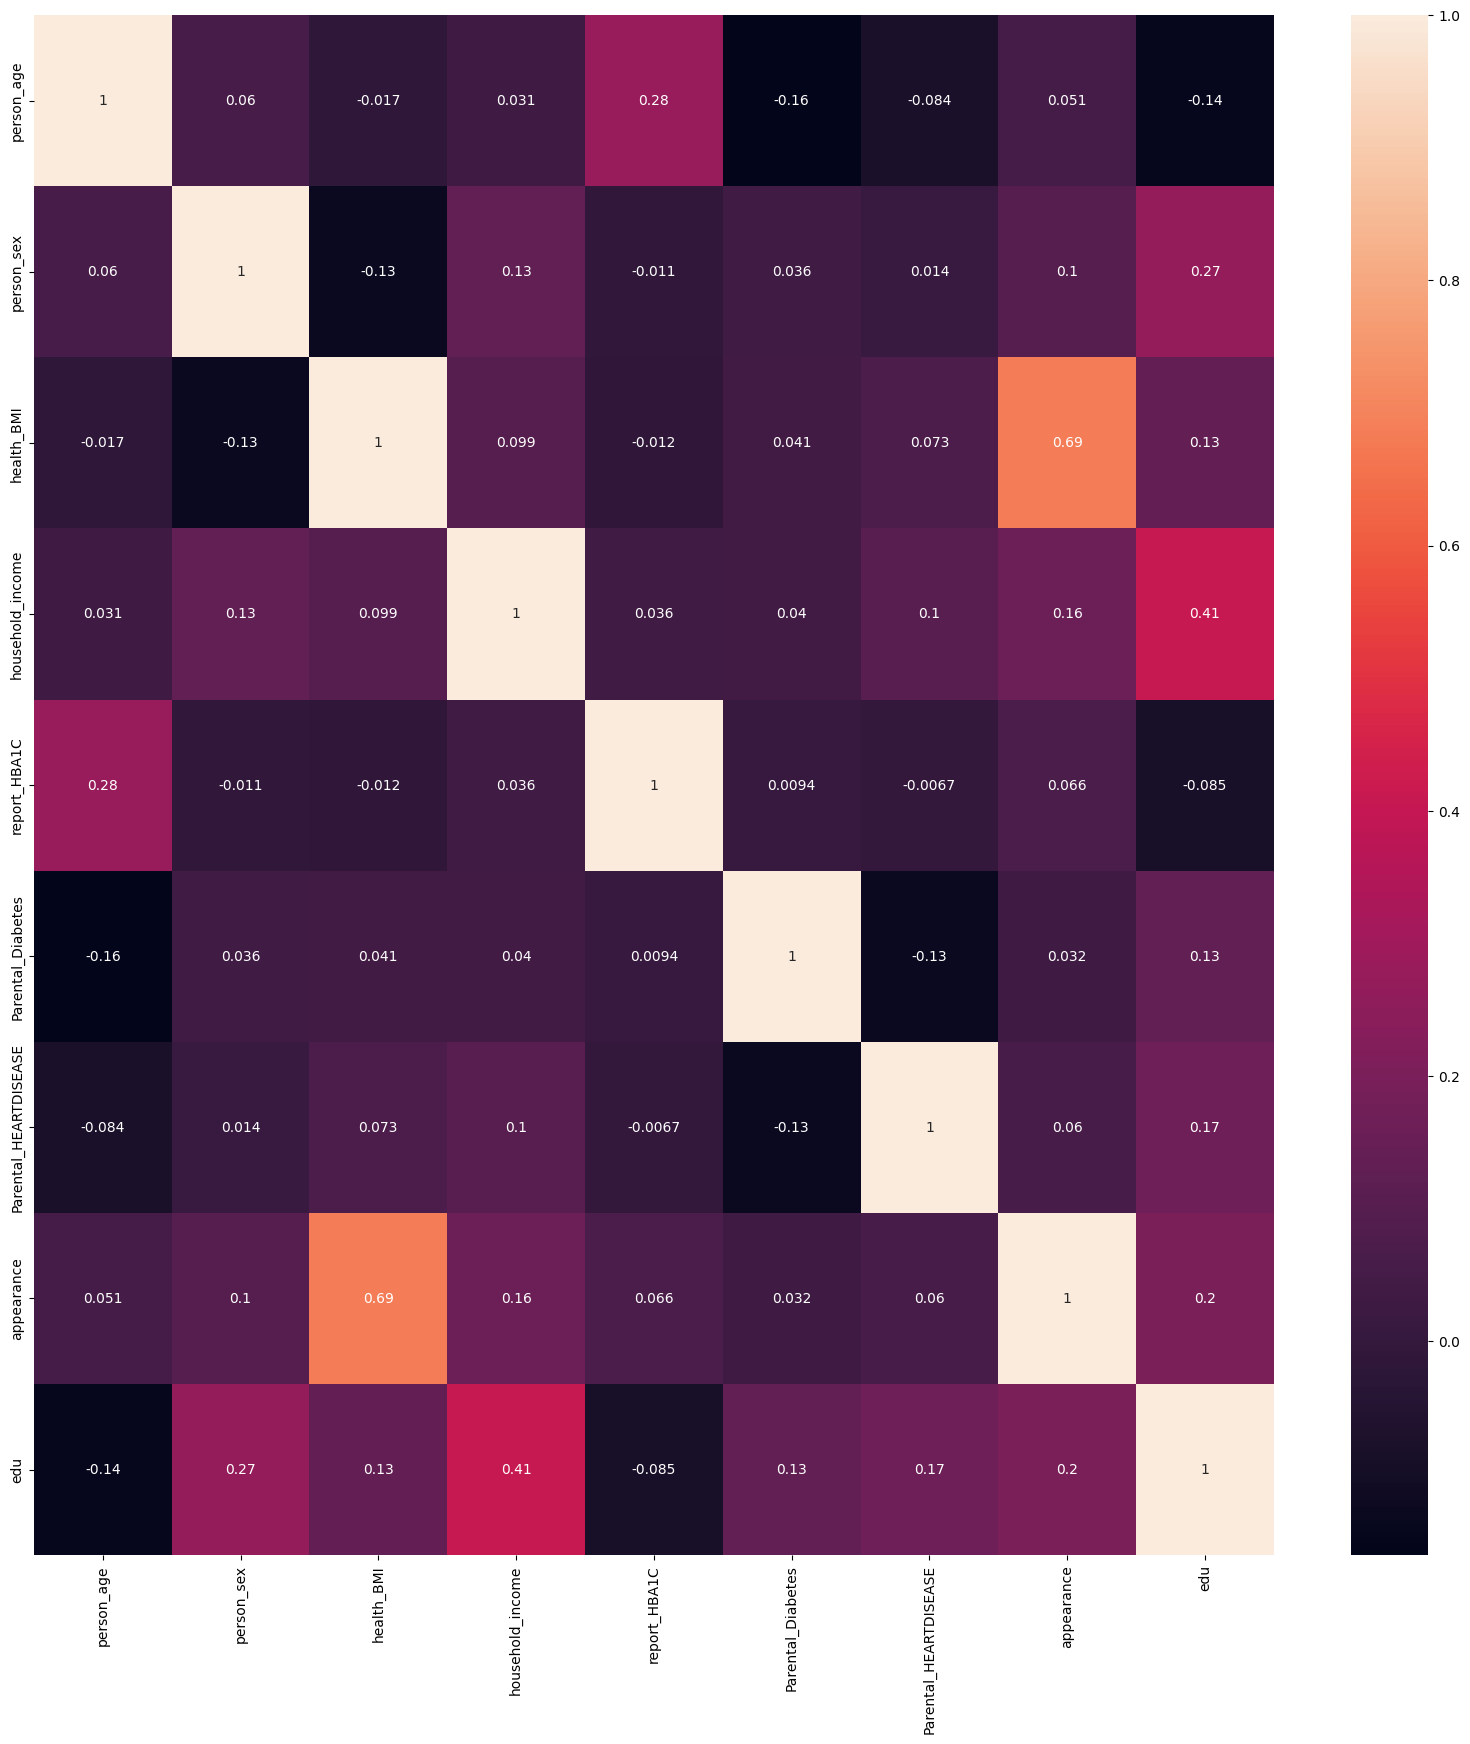

In [14]:
corr_hmap=new_df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr_hmap,annot=True)
plt.show()


In [33]:
new_df=new_df.drop(columns=['health_BMI',"report_HBA1C"])

In [34]:
poly = PolynomialFeatures(2, include_bias=False)
trans = poly.fit_transform(new_df)

In [35]:
columns = poly.get_feature_names_out(input_features=None)
columns

array(['person_age', 'person_sex', 'household_income',
       'Parental_Diabetes', 'Parental_HEARTDISEASE', 'appearance', 'edu',
       'person_age^2', 'person_age person_sex',
       'person_age household_income', 'person_age Parental_Diabetes',
       'person_age Parental_HEARTDISEASE', 'person_age appearance',
       'person_age edu', 'person_sex^2', 'person_sex household_income',
       'person_sex Parental_Diabetes', 'person_sex Parental_HEARTDISEASE',
       'person_sex appearance', 'person_sex edu', 'household_income^2',
       'household_income Parental_Diabetes',
       'household_income Parental_HEARTDISEASE',
       'household_income appearance', 'household_income edu',
       'Parental_Diabetes^2', 'Parental_Diabetes Parental_HEARTDISEASE',
       'Parental_Diabetes appearance', 'Parental_Diabetes edu',
       'Parental_HEARTDISEASE^2', 'Parental_HEARTDISEASE appearance',
       'Parental_HEARTDISEASE edu', 'appearance^2', 'appearance edu',
       'edu^2'], dtype=object)

In [36]:
poly_df = pd.DataFrame(data=trans, index=new_df.index, columns= columns)
poly_df

,person_age,person_sex,household_income,Parental_Diabetes,Parental_HEARTDISEASE,appearance,edu,person_age^2,person_age person_sex,person_age household_income,...,Parental_Diabetes^2,Parental_Diabetes Parental_HEARTDISEASE,Parental_Diabetes appearance,Parental_Diabetes edu,Parental_HEARTDISEASE^2,Parental_HEARTDISEASE appearance,Parental_HEARTDISEASE edu,appearance^2,appearance edu,edu^2
0,0.246451,0.0,-0.180544,0.0,0.0,0.0,4.0,0.060738,0.000000,-0.044495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
1,-0.341400,1.0,-0.444563,0.0,0.0,1.0,1.0,0.116554,-0.341400,0.151774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,1.590111,1.0,0.314492,0.0,1.0,1.0,3.0,2.528454,1.590111,0.500077,...,0.0,0.0,0.0,0.0,1.0,1.0,3.0,1.0,3.0,9.0
3,1.590111,0.0,0.149480,0.0,0.0,1.0,3.0,2.528454,0.000000,0.237690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,9.0
4,1.422154,1.0,0.314492,0.0,0.0,2.0,3.0,2.022521,1.422154,0.447256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,0.834302,1.0,0.314492,0.0,0.0,3.0,4.0,0.696060,0.834302,0.262381,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,12.0,16.0
2200,0.498387,1.0,-0.345556,0.0,0.0,2.0,2.0,0.248390,0.498387,-0.172220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0
2201,-1.853018,1.0,-0.510567,1.0,0.0,1.0,2.0,3.433676,-1.853018,0.946091,...,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,4.0
2202,-0.509358,1.0,1.634586,0.0,1.0,2.0,2.0,0.259445,-0.509358,-0.832589,...,0.0,0.0,0.0,0.0,1.0,2.0,2.0,4.0,4.0,4.0


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"] = [variance_inflation_factor(poly_df,i) for i in range (poly_df.shape[1])]
vif["features"]=poly_df.columns
vif

,vif,features
0,8.536184,person_age
1,inf,person_sex
2,19.326274,household_income
3,inf,Parental_Diabetes
4,inf,Parental_HEARTDISEASE
5,34.432495,appearance
6,50.118569,edu
7,2.251506,person_age^2
8,2.989017,person_age person_sex
9,1.727746,person_age household_income


In [40]:
from sklearn.model_selection import train_test_split
minMSE=1
maxRS=0
X= poly_df
y=df["report_HBA1C"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=0)

In [41]:
x_test.shape

(433, 35)

In [42]:
x_train.shape

(1297, 35)

In [43]:
import statsmodels.api as sm
#X2 = sm.add_constant(X)
#est = sm.OLS(y_train,second_step_poly)
est = sm.OLS(y_train,x_train)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:           report_HBA1C   R-squared (uncentered):                   0.130
Model:                            OLS   Adj. R-squared (uncentered):              0.108
Method:                 Least Squares   F-statistic:                              6.089
Date:                Thu, 26 Sep 2024   Prob (F-statistic):                    1.50e-22
Time:                        09:58:52   Log-Likelihood:                         -1736.2
No. Observations:                1297   AIC:                                      3534.
Df Residuals:                    1266   BIC:                                      3695.
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------

In [61]:
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=6)
plsfit = pls.fit(x_train, y_train)

In [62]:
plsfit.score(x_train, y_train)

0.1279935897060176

In [63]:
plsfit.score(x_test,y_test)

0.03527505937550035

In [ ]:
# Importing library, for  ANOVA
from scipy.stats import f_oneway
# Conduct the one-way ANOVA
f_oneway(performance1, performance2, performance3, performance4)